In [2]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Step 3: Preprocess the dataset
# Reshape the data to flatten the 28x28 images into 1D vectors (28*28 = 784)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the data to values between 0 and 1
x_train /= 255.0
x_test /= 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Step 4: Define the neural network architecture
model = Sequential([
    # Flatten the input data (28x28 pixels)
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    # First Dense Layer with ReLU activation
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    Dropout(0.2),

    # Output layer with softmax activation for multiclass classification
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Step 5: Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8043 - loss: 0.6767 - val_accuracy: 0.9471 - val_loss: 0.1858
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9443 - loss: 0.1978 - val_accuracy: 0.9603 - val_loss: 0.1334
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9582 - loss: 0.1434 - val_accuracy: 0.9672 - val_loss: 0.1084
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9658 - loss: 0.1166 - val_accuracy: 0.9708 - val_loss: 0.0960
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9702 - loss: 0.0990 - val_accuracy: 0.9755 - val_loss: 0.0833
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9735 - loss: 0.0879 - val_accuracy: 0.9752 - val_loss: 0.0837
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9770 - loss: 0.0756 - val_accuracy: 0.9763 - val_loss: 0.0776
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9807 - loss: 0.0651 - val_accuracy: 0.

In [16]:
# Step 7: Upload an image (using Google Colab uploader)
uploaded = files.upload()

Saving 5.png to 5.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class label: 5


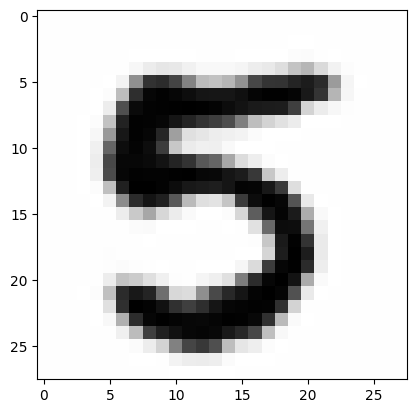

In [17]:
# Step 8: Load the uploaded image
for fn in uploaded.keys():
    # Open the uploaded image
    img = Image.open(fn)

    # Step 9: Preprocess the image data (convert to grayscale, resize, normalize)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img).astype('float32')  # Convert to numpy array
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input
    img /= 255.0  # Normalize the image data

    # Step 10: Predict the class label using the trained model
    prediction = model.predict(img)

    # Step 11: Print the predicted class label
    predicted_label = np.argmax(prediction)
    print(f"Predicted class label: {predicted_label}")

    # Optionally display the uploaded image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()

In [ ]:
#Final Complete code

# Practical 5: To implement an HPC application for AI/ML domain to accelerate the training and testing of machine learning models using parallel processing capabilities of an HPC system. 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255.0
x_test /= 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Define the neural network architecture
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# Step 7: Upload an image (using Google Colab uploader)
uploaded = files.upload()

# Step 8: Load the uploaded image
for fn in uploaded.keys():
    img = Image.open(fn)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img).astype('float32')  # Convert to numpy array
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input
    img /= 255.0  # Normalize the image data
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    print(f"Predicted class label: {predicted_label}")
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()